In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Generate synthetic dataset as a placeholder
# Setting a random seed ensures reproducibility of results.
# This means that every time the script runs, the dataset generated will be the same.
np.random.seed(42)
X, _ = make_blobs(n_samples=1000, n_features=64, centers=10, random_state=42)

# Function to visualize clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# K-Means Clustering
def kmeans_clustering(X):
    distortions = []
    K_range = range(1, 110)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(K_range, distortions, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal K')
    plt.show()

    optimal_k = int(input("Choose the optimal K: "))
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    plot_clusters(X, labels, "K-Means Clustering")
    return labels

# Agglomerative Hierarchical Clustering
def agglomerative_clustering(X):
    plt.figure(figsize=(10, 5))
    linkage_matrix = linkage(X[:200], method='ward')
    dendrogram(linkage_matrix)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()

    # num_clusters = int(input("Choose the number of clusters from dendrogram: "))
    num_clusters = 10
    agglo = AgglomerativeClustering(n_clusters=num_clusters)
    labels = agglo.fit_predict(X)
    plot_clusters(X, labels, "Agglomerative Clustering")
    return labels

# DBSCAN Clustering
def dbscan_clustering(X):
    eps_values = [0.5, 1.0, 1.5]
    min_samples_values = [5, 10, 20]

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            # num_clusters = len(set(labels)) - (1 if -1 in labels else 10)
            num_clusters = 10
            print(f"DBSCAN with eps={eps}, min_samples={min_samples}: {num_clusters} clusters")

    chosen_eps = float(input("Choose epsilon (ε): "))
    chosen_min_samples = int(input("Choose minPts: "))
    dbscan = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples)
    labels = dbscan.fit_predict(X)
    plot_clusters(X, labels, "DBSCAN Clustering")
    return labels

# Gaussian Mixture Model (GMM) Clustering
def gmm_clustering(X, optimal_k):
    gmm = GaussianMixture(n_components=optimal_k, random_state=42)
    labels = gmm.fit_predict(X)
    plot_clusters(X, labels, "GMM Clustering")
    return labels


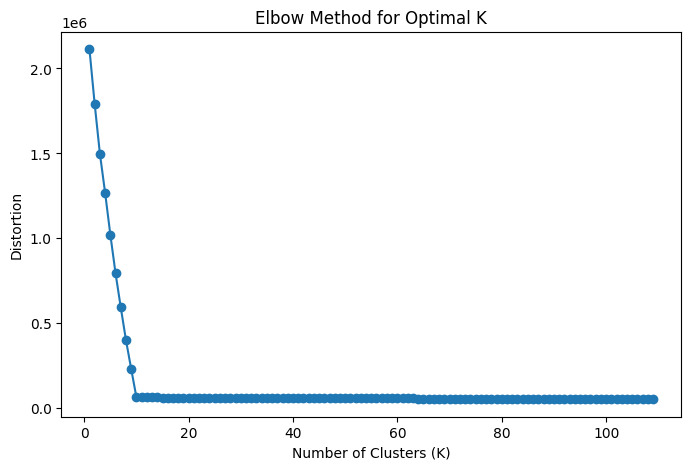

Choose the optimal K: 10


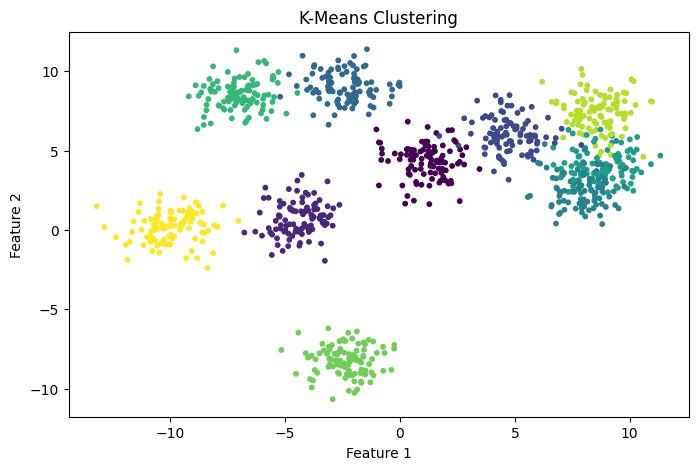

In [ ]:
# Running the clustering methods
kmeans_labels = kmeans_clustering(X)

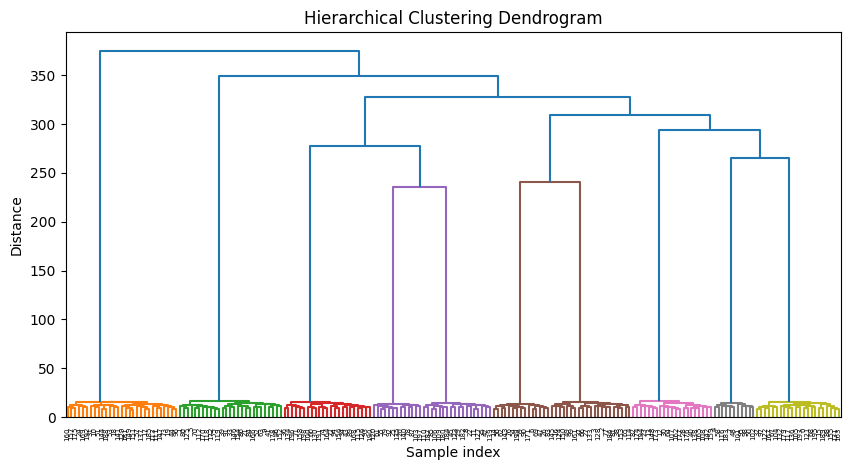

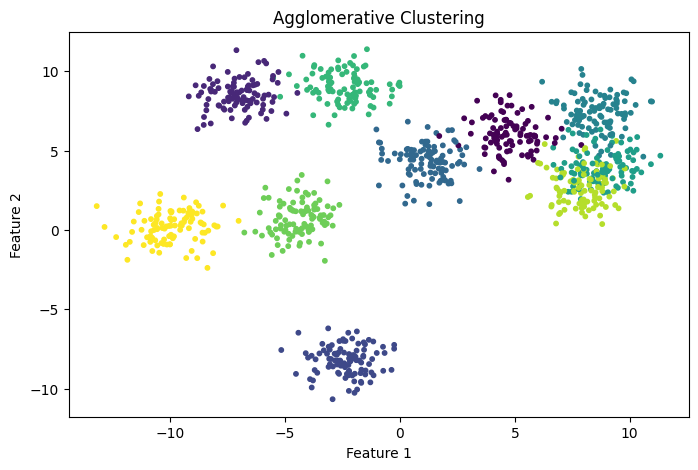

chosen no of clusters from dendograms = 10


In [ ]:
agglo_labels = agglomerative_clustering(X)
print("chosen no of clusters from dendograms = 10")

DBSCAN with eps=0.5, min_samples=5: 10 clusters
DBSCAN with eps=0.5, min_samples=10: 10 clusters
DBSCAN with eps=0.5, min_samples=20: 10 clusters
DBSCAN with eps=1.0, min_samples=5: 10 clusters
DBSCAN with eps=1.0, min_samples=10: 10 clusters
DBSCAN with eps=1.0, min_samples=20: 10 clusters
DBSCAN with eps=1.5, min_samples=5: 10 clusters
DBSCAN with eps=1.5, min_samples=10: 10 clusters
DBSCAN with eps=1.5, min_samples=20: 10 clusters
Choose epsilon (ε): 10
Choose minPts: 3


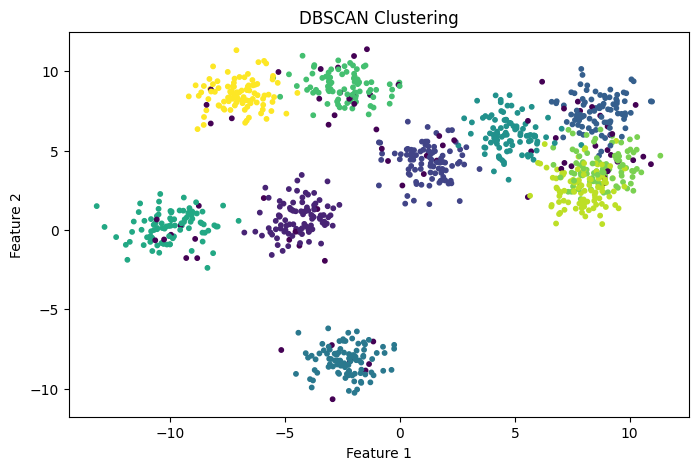

In [ ]:
dbscan_labels = dbscan_clustering(X)

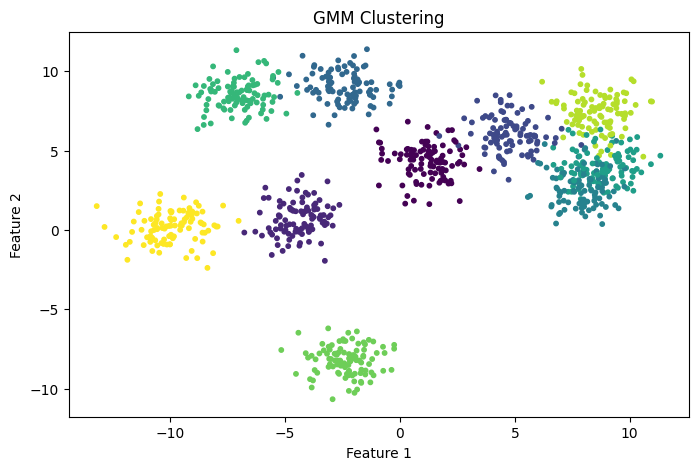

In [ ]:
gmm_labels = gmm_clustering(X, optimal_k=10)

In [ ]:
# Compare Clustering Results
print("Silhouette Scores:")
print(f"K-Means: {silhouette_score(X, kmeans_labels)}")
print(f"Agglomerative: {silhouette_score(X, agglo_labels)}")
print(f"DBSCAN: {silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A'}")
print(f"GMM: {silhouette_score(X, gmm_labels)}")

Silhouette Scores:
K-Means: 0.815697400633372
Agglomerative: 0.815697400633372
DBSCAN: 0.6898313520495526
GMM: 0.815697400633372
